In [ ]:
# GDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dataset 1

In [ ]:
train10 = pd.read_csv('/content/drive/MyDrive/PRML/Assignment-1/Dataset1/train10.txt')
train50 = pd.read_csv('/content/drive/MyDrive/PRML/Assignment-1/Dataset1/train50.txt')
test = pd.read_csv('/content/drive/MyDrive/PRML/Assignment-1/Dataset1/test.txt')
val = pd.read_csv('/content/drive/MyDrive/PRML/Assignment-1/Dataset1/val.txt')

### Polynomial Basis Functions

In [ ]:
def create_phi(data, degree):
  temp = ([1]*data.shape[0],)
  for i in range(1, degree+1):
    temp += (data.x**i,)
  phi = np.array(temp).T
  return phi

In [ ]:
def get_weights(data, phi, lamda=0):
  n = phi.shape[1]
  w = np.linalg.inv(phi.T @ phi + lamda * np.identity(n)) @ phi.T @ data.y
  return w

In [ ]:
def get_acc(data, phi, w):
    y_pred = phi @ w
    return np.sqrt(((y_pred - data.y.values)**2).mean())

Without Regularization

Degree: 3


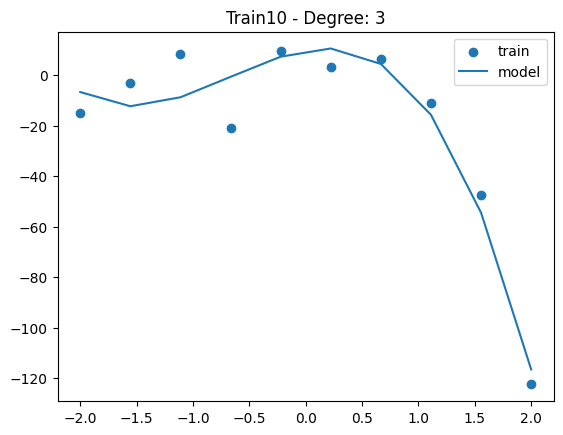


	Train10 Error: 10.12
	Test: 13.37
	Val: 13.73


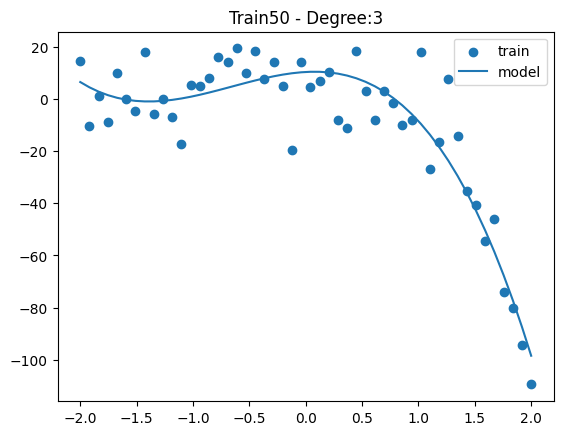


	Train50: 11.42
	Test: 12.61
	Val: 14.40


Degree: 5


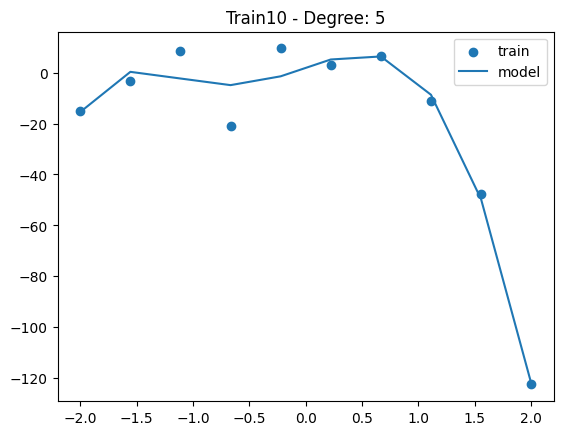


	Train10 Error: 7.20
	Test: 11.22
	Val: 13.60


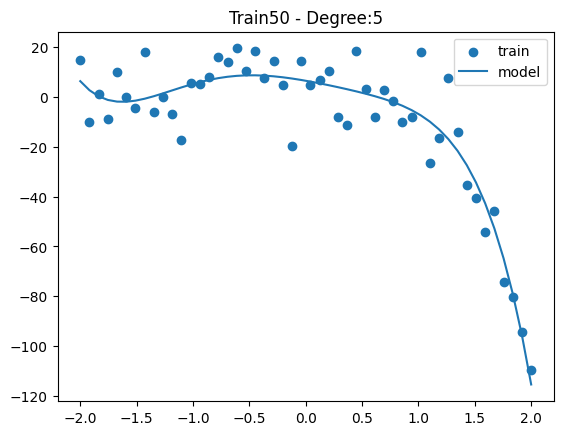


	Train50: 10.34
	Test: 11.59
	Val: 13.91


Degree: 7


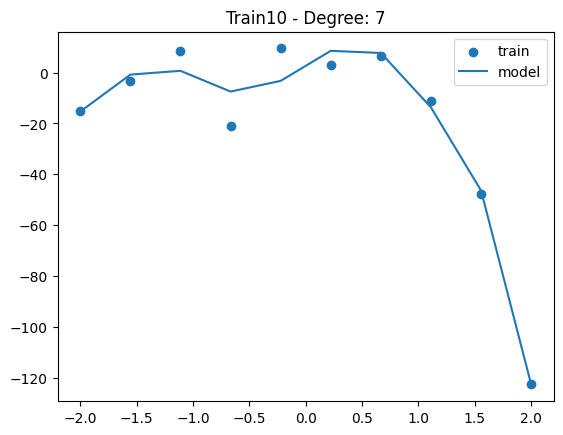


	Train10 Error: 6.69
	Test: 11.40
	Val: 13.80


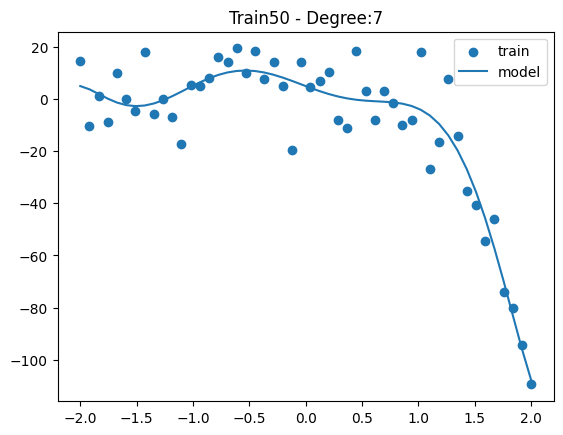


	Train50: 10.06
	Test: 12.14
	Val: 13.74


Degree: 9


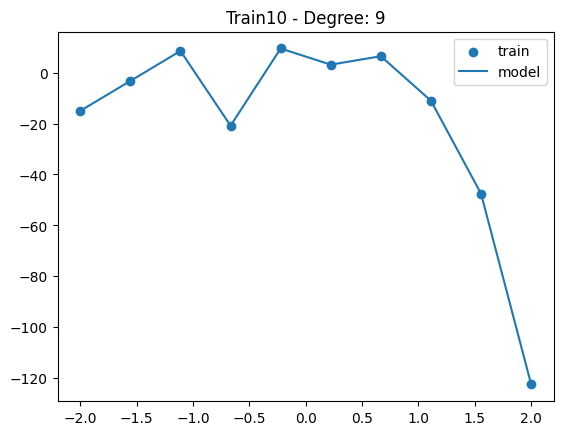


	Train10 Error: 0.00
	Test: 39.53
	Val: 39.71


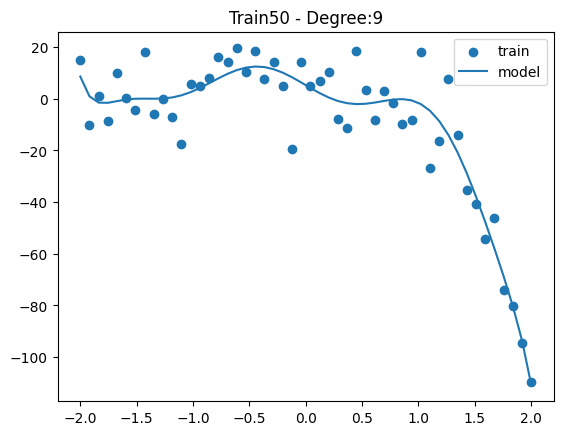


	Train50: 9.89
	Test: 12.03
	Val: 14.02




In [ ]:
# Dataset1
# Training loop
degrees = [3, 5, 7, 9]
for degree in degrees:
  phi_train10 = create_phi(train10, degree)
  phi_train50 = create_phi(train50, degree)

  w_train10 = get_weights(train10, phi_train10)
  w_train50 = get_weights(train50, phi_train50)
  phi_test = create_phi(test, degree)
  phi_val = create_phi(val, degree)

  acc_train10 = get_acc(train10, phi_train10, w_train10)
  acc_train50 = get_acc(train50, phi_train50, w_train50)

  print(f'Degree: {degree}')

  # plotting
  y_pred_train10 = phi_train10 @ w_train10
  plt.scatter(train10.x, train10.y, label='train')
  plt.plot(train10.x, y_pred_train10, label='model')
  plt.title(f"Train10 - Degree: {degree}")
  plt.legend()
  plt.show()

  acc_test = get_acc(test, phi_test, w_train10)
  acc_val = get_acc(val, phi_val, w_train10)

  print(f'\n\tTrain10 Error: {acc_train10:.2f}')
  print(f'\tTest: {acc_test:.2f}')
  print(f'\tVal: {acc_val:.2f}')

  # plotting
  y_pred_train50 = phi_train50 @ w_train50
  plt.scatter(train50.x, train50.y, label='train')
  plt.plot(train50.x, y_pred_train50, label='model')
  plt.title(f"Train50 - Degree:{degree}")
  plt.legend()
  plt.show()

  acc_test = get_acc(test, phi_test, w_train50)
  acc_val = get_acc(val, phi_val, w_train50)

  print(f'\n\tTrain50: {acc_train50:.2f}')
  print(f'\tTest: {acc_test:.2f}')
  print(f'\tVal: {acc_val:.2f}')

  print('\n')

With Regularization

Degree: 7, Reg: 0.001


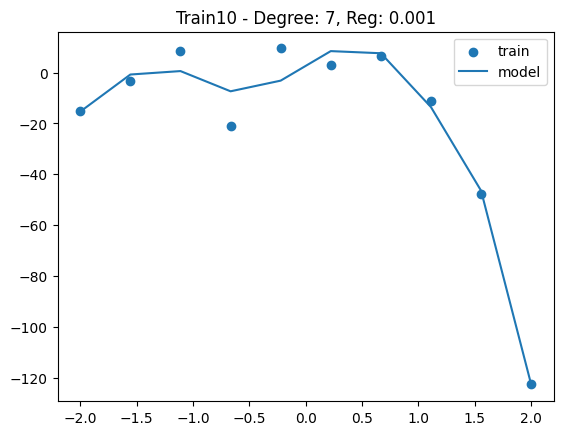


	Train10 Error: 6.69
	Test: 11.36
	Val: 13.78


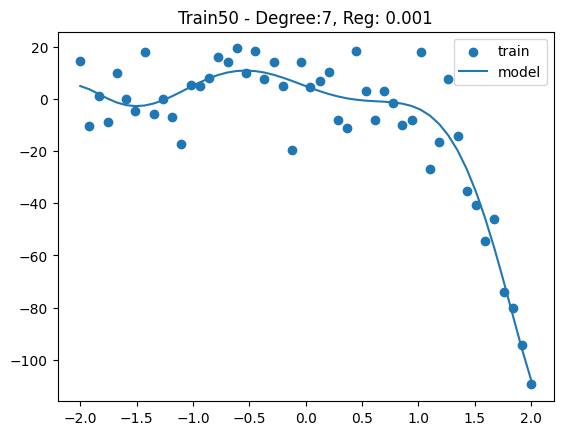


	Train50: 10.06
	Test: 12.14
	Val: 13.74


Degree: 7, Reg: 0.1


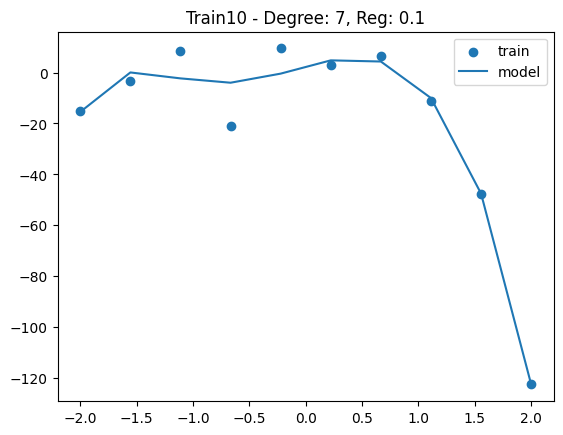


	Train10 Error: 7.20
	Test: 10.84
	Val: 13.40


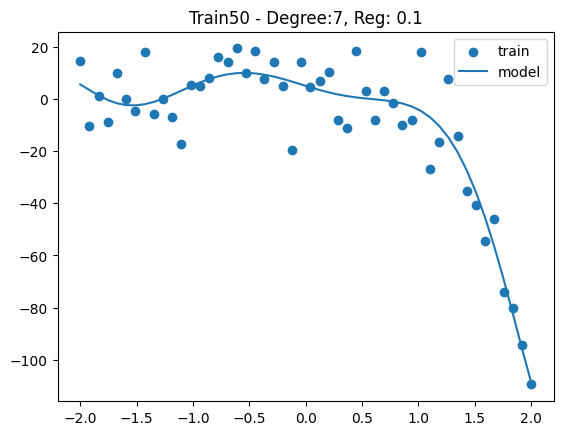


	Train50: 10.07
	Test: 11.96
	Val: 13.66


Degree: 7, Reg: 1


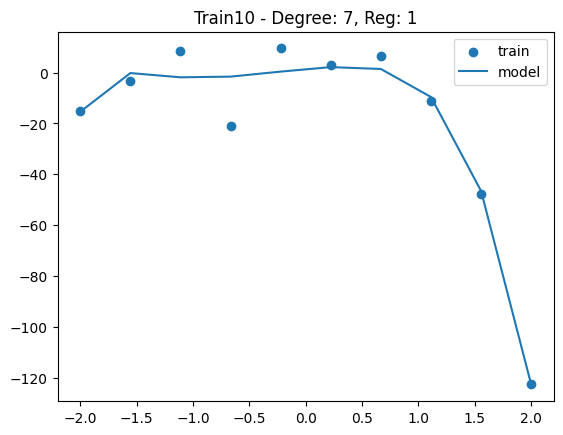


	Train10 Error: 7.75
	Test: 10.70
	Val: 13.28


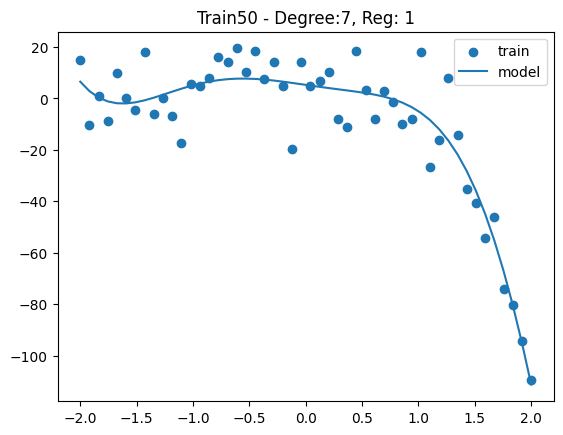


	Train50: 10.24
	Test: 11.58
	Val: 13.55


Degree: 9, Reg: 0.001


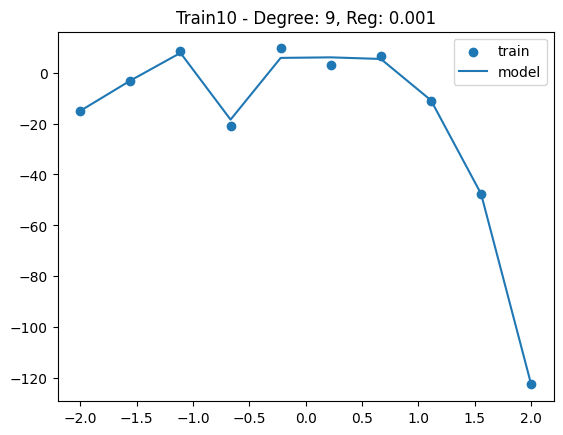


	Train10 Error: 1.71
	Test: 29.32
	Val: 29.67


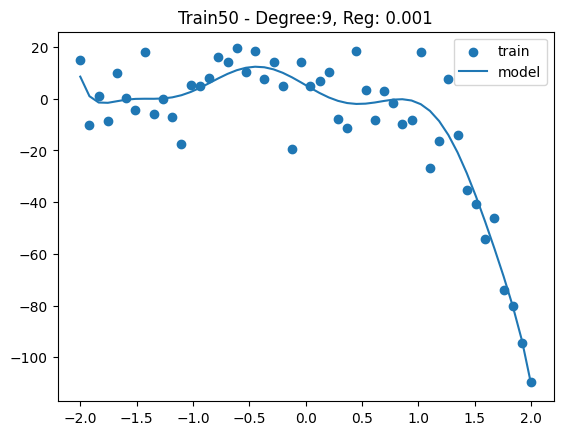


	Train50: 9.89
	Test: 12.02
	Val: 14.01


Degree: 9, Reg: 0.1


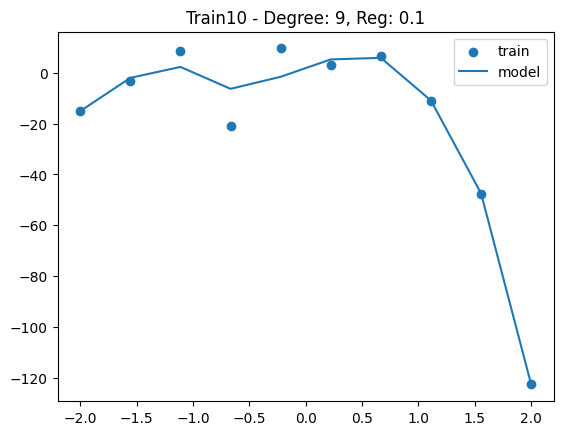


	Train10 Error: 6.15
	Test: 11.81
	Val: 13.69


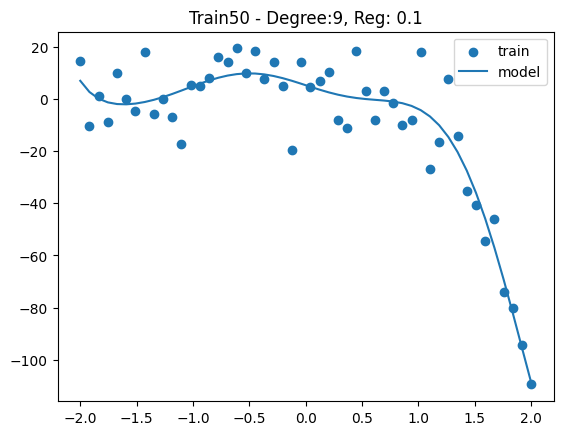


	Train50: 10.03
	Test: 11.92
	Val: 13.65


Degree: 9, Reg: 1


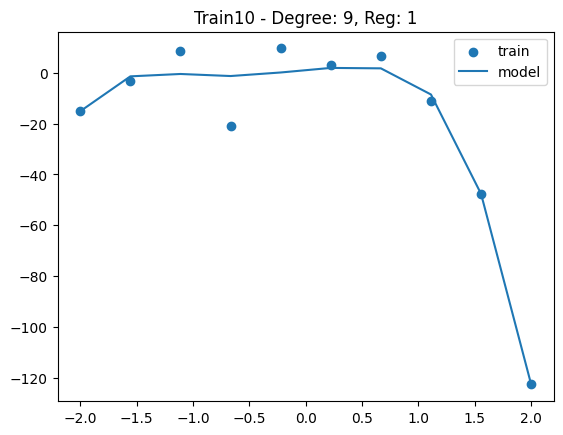


	Train10 Error: 7.65
	Test: 10.89
	Val: 13.11


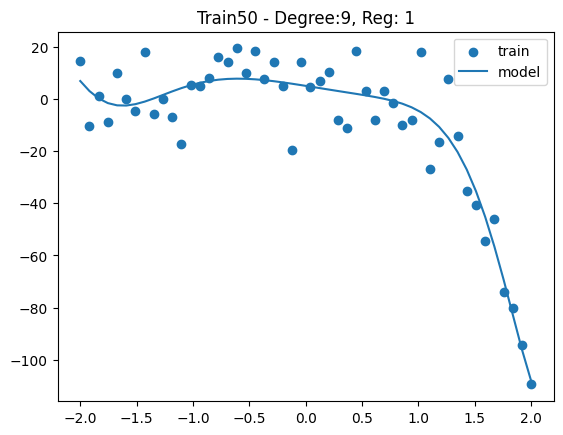


	Train50: 10.22
	Test: 11.81
	Val: 13.45




In [ ]:
degrees = [7, 9]
for degree in degrees:
  for l in [0.001, 0.1, 1]:
    phi_train10 = create_phi(train10, degree)
    phi_train50 = create_phi(train50, degree)

    w_train10 = get_weights(train10, phi_train10, l)
    w_train50 = get_weights(train50, phi_train50, l)
    phi_test = create_phi(test, degree)
    phi_val = create_phi(val, degree)

    acc_train10 = get_acc(train10, phi_train10, w_train10)
    acc_train50 = get_acc(train50, phi_train50, w_train50)

    print(f'Degree: {degree}, Reg: {l}')

    # plotting
    y_pred_train10 = phi_train10 @ w_train10
    plt.scatter(train10.x, train10.y, label='train')
    plt.plot(train10.x, y_pred_train10, label='model')
    plt.title(f"Train10 - Degree: {degree}, Reg: {l}")
    plt.legend()
    plt.show()

    acc_test = get_acc(test, phi_test, w_train10)
    acc_val = get_acc(val, phi_val, w_train10)

    print(f'\n\tTrain10 Error: {acc_train10:.2f}')
    print(f'\tTest: {acc_test:.2f}')
    print(f'\tVal: {acc_val:.2f}')

    # plotting
    y_pred_train50 = phi_train50 @ w_train50
    plt.scatter(train50.x, train50.y, label='train')
    plt.plot(train50.x, y_pred_train50, label='model')
    plt.title(f"Train50 - Degree:{degree}, Reg: {l}")
    plt.legend()
    plt.show()

    acc_test = get_acc(test, phi_test, w_train50)
    acc_val = get_acc(val, phi_val, w_train50)

    print(f'\n\tTrain50: {acc_train50:.2f}')
    print(f'\tTest: {acc_test:.2f}')
    print(f'\tVal: {acc_val:.2f}')

    print('\n')

### Gaussian basis functions

In [ ]:
def get_centers(data, num_funcs=1):
    # num_funcs = int(data.shape[0] * num_funcs)

    x_min = data.x.min()
    x_max = data.x.max()
    x_range = x_max - x_min

    centers = np.linspace(x_min, x_max, num_funcs)
    return centers

In [ ]:
def create_phi_gaussian(data, centers):
  temp = ([1]*data.shape[0],)
  sigma = 1/len(centers)*(max(centers)-min(centers))

  if len(centers) == 1:
    sigma = 1
  for i in centers:
    temp += (np.exp(-(data.x - i)**2)/2/sigma**2,)
  phi = np.array(temp).T
  return phi

Train 10
	Basis Functions: 1
	Train10 Error: 37.16
	Test: 31.04
	Val: 29.01


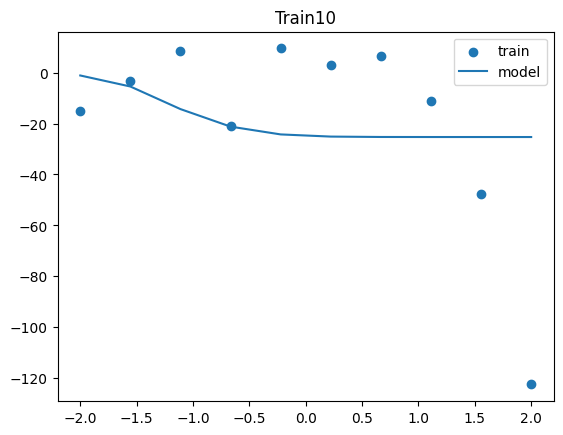


Train 50
	Basis Functions: 3
	Train50: 10.22
	Test: 15.11
	Val: 16.03


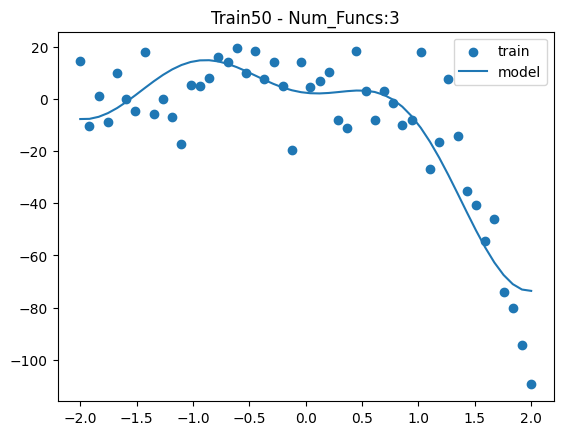



	Basis Functions: 4
	Train50: 10.22
	Test: 12.41
	Val: 15.22


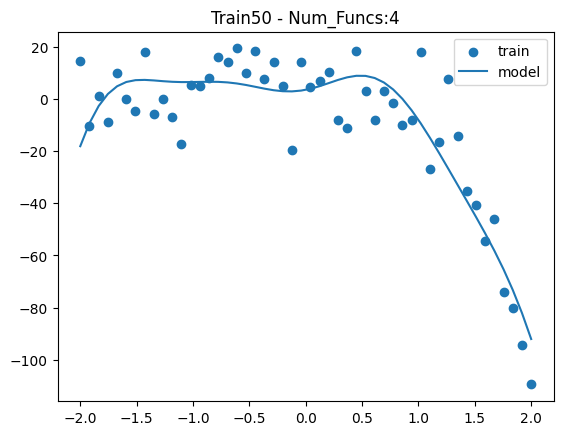



	Basis Functions: 5
	Train50: 10.22
	Test: 12.13
	Val: 14.54


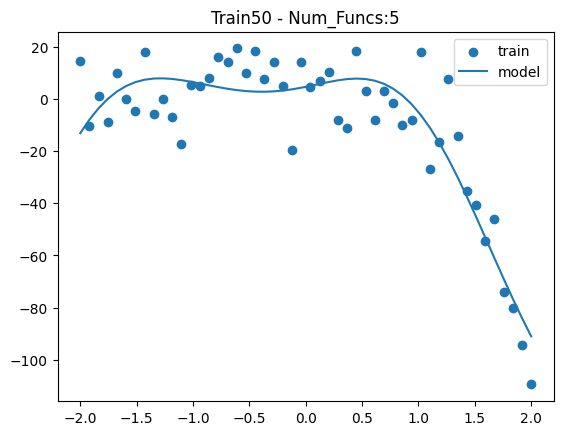

In [ ]:
# Training loop

# Train10
print("Train 10\n\tBasis Functions: 1")
centers = get_centers(train10)
phi_train10 = create_phi_gaussian(train10, centers)

w_train10 = get_weights(train10, phi_train10)
phi_test = create_phi_gaussian(test, centers)
phi_val = create_phi_gaussian(val, centers)

acc_train10 = get_acc(train10, phi_train10, w_train10)
print(f'\tTrain10 Error: {acc_train10:.2f}')

acc_test = get_acc(test, phi_test, w_train10)
acc_val = get_acc(val, phi_val, w_train10)

print(f'\tTest: {acc_test:.2f}')
print(f'\tVal: {acc_val:.2f}')

# plotting
y_pred_train10 = phi_train10 @ w_train10
plt.scatter(train10.x, train10.y, label='train')
plt.plot(train10.x, y_pred_train10, label='model')
plt.title(f"Train10")
plt.legend()
plt.show()

# Train50
print("\nTrain 50")
num_funcs = [3,4,5]

for num_func in num_funcs:
  print("\tBasis Functions:", num_func)
  centers = get_centers(train50, num_func)
  phi_train50 = create_phi_gaussian(train50, centers)

  w_train50 = get_weights(train50, phi_train50)
  print(f'\tTrain50: {acc_train50:.2f}')

  phi_test = create_phi_gaussian(test, centers)
  phi_val = create_phi_gaussian(val, centers)

  acc_test = get_acc(test, phi_test, w_train50)
  acc_val = get_acc(val, phi_val, w_train50)

  print(f'\tTest: {acc_test:.2f}')
  print(f'\tVal: {acc_val:.2f}')

  # plotting
  y_pred_train50 = phi_train50 @ w_train50
  plt.scatter(train50.x, train50.y, label='train')
  plt.plot(train50.x, y_pred_train50, label='model')
  plt.title(f"Train50 - Num_Funcs:{num_func}")
  plt.legend()
  plt.show()

  print('\n')

### Best Model



In [ ]:
degree = 9
l = 1

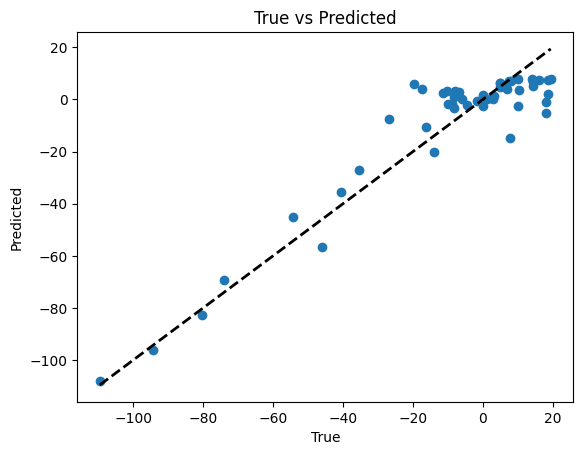

In [ ]:
# Plotting tn vs yn for degree=2
phi_train_d3 = create_phi(train50, degree)
w_train_d3 = get_weights(train50, phi_train_d3, l)

y_pred = phi_train_d3 @ w_train_d3

# plot true vs predicted
plt.scatter(train50.y, y_pred)
# plot a x=y line
plt.plot([train50.y.min(), train50.y.max()], [train50.y.min(), train50.y.max()], 'k--', lw=2)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('True vs Predicted')
plt.show()

##Dataset 2

In [ ]:
train25_d2 = pd.read_csv('/content/drive/MyDrive/PRML/Assignment-1/Dataset2/train25.csv')
train100_d2 = pd.read_csv('/content/drive/MyDrive/PRML/Assignment-1/Dataset2/train100.csv')
test_d2 = pd.read_csv('/content/drive/MyDrive/PRML/Assignment-1/Dataset2/test.csv')
val_d2 = pd.read_csv('/content/drive/MyDrive/PRML/Assignment-1/Dataset2/validation.csv')

In [ ]:
train25_d2.shape, train100_d2.shape, test_d2.shape, val_d2.shape

((25, 3), (100, 3), (100, 3), (100, 3))

In [ ]:
train100_d2.head()

x1        x2          y
0 -1.611361  0.978593 -31.094832
1  1.595497 -0.959124 -78.258603
2  0.515092 -1.830646 -10.413323
3 -0.453742 -0.828232  -0.861458
4 -1.085524  0.578894   2.072724

###Polynomial Basis Functions

In [ ]:
def create_phi_d2(data, degree):

    temp = ([1]*data.shape[0],)

    for i in range(1, degree+1):
        temp += (data.x1**i,)
        temp += (data.x2**i,)

        for j in range(1,i):
            temp += ((data.x1**j)*(data.x2**(i-j)),)


    phi = np.array(temp).T
    return phi

In [ ]:
def get_weights_d2(data, phi, lamda=0):
    n = phi.shape[1]
    w = np.linalg.inv(phi.T @ phi + lamda * np.identity(n)) @ phi.T @ data.y
    return w

In [ ]:
def get_acc_d2(data, phi, w):
    y_pred = phi @ w
    return np.sqrt(((y_pred - data.y.values)**2).mean())

In [ ]:
def get_pred_d2(phi, w):
    return phi @ w

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

Degree: 2
	Train25_d2 Error: 12.83
	Test25_d2: 39.24
	Val25_d2: 38.76

	Train100: 24.14
	Test100_d2: 27.52
	Val100_d2: 32.22




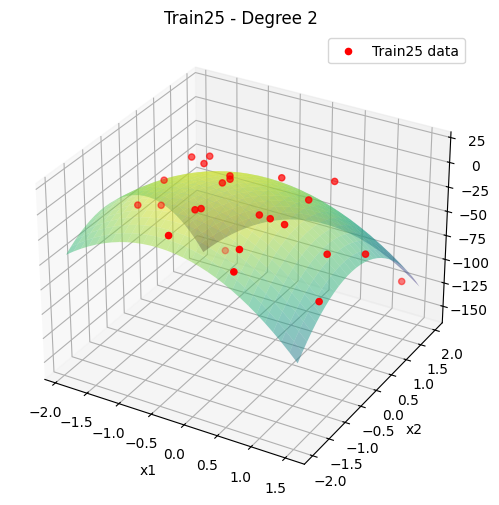

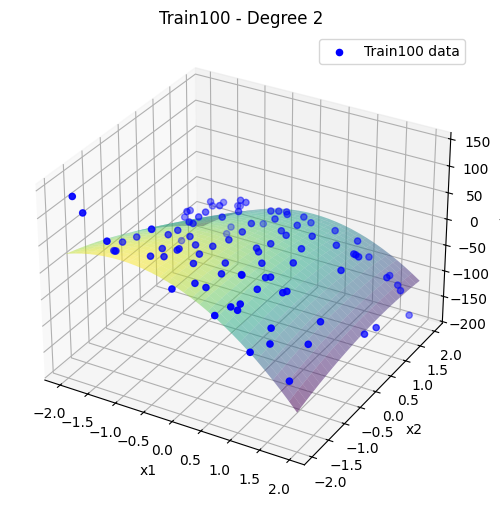

Degree: 4
	Train25_d2 Error: 1.05
	Test25_d2: 40.91
	Val25_d2: 28.73

	Train100: 4.48
	Test100_d2: 7.01
	Val100_d2: 10.23




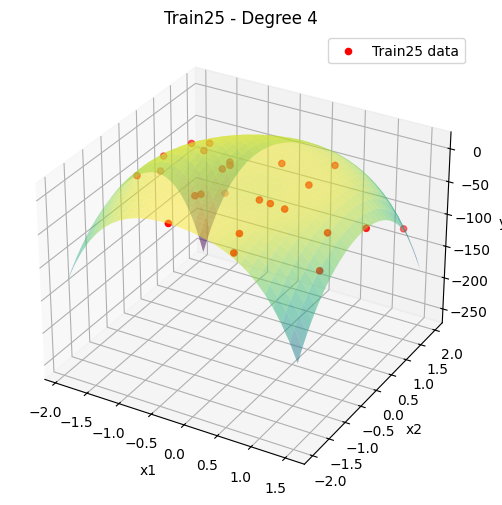

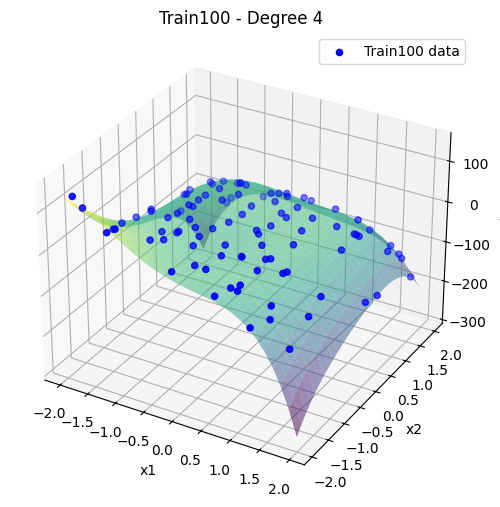

Degree: 6
	Train25_d2 Error: 153.91
	Test25_d2: 314.37
	Val25_d2: 257.12

	Train100: 0.08
	Test100_d2: 0.13
	Val100_d2: 0.14




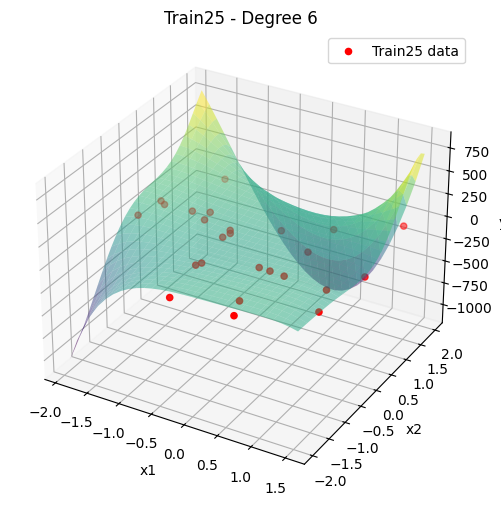

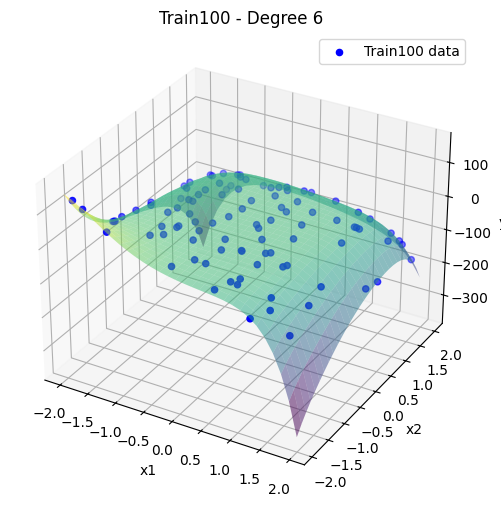

Degree: 8
	Train25_d2 Error: 281.63
	Test25_d2: 6935.00
	Val25_d2: 5835.30

	Train100: 0.07
	Test100_d2: 0.29
	Val100_d2: 0.37




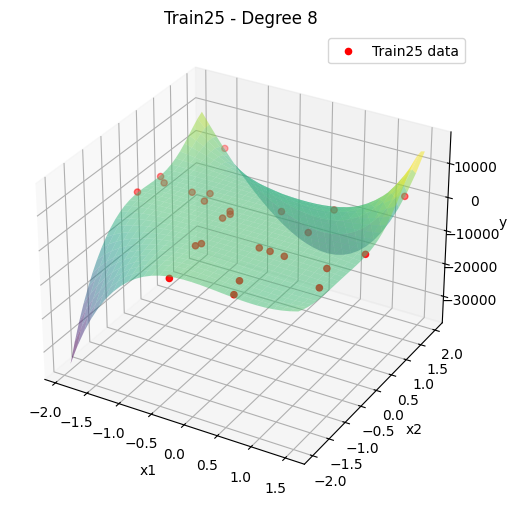

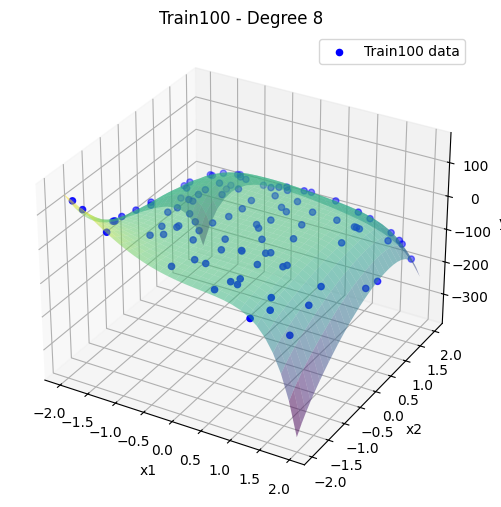

In [ ]:
# Dataset2
results = []
# Training loop
degrees = [2, 4, 6, 8]
for degree in degrees:
    phi_train25_d2 = create_phi_d2(train25_d2, degree)
    phi_train100_d2 = create_phi_d2(train100_d2, degree)

    w_train25_d2 = get_weights_d2(train25_d2, phi_train25_d2)
    w_train100_d2 = get_weights_d2(train100_d2, phi_train100_d2)
    phi_test_d2 = create_phi_d2(test_d2, degree)
    phi_val_d2 = create_phi_d2(val_d2, degree)

    acc_train25_d2 = get_acc_d2(train25_d2, phi_train25_d2, w_train25_d2)
    acc_train100_d2 = get_acc_d2(train100_d2, phi_train100_d2, w_train100_d2)

    print(f'Degree: {degree}')
    print(f'\tTrain25_d2 Error: {acc_train25_d2:.2f}')

    acc_test25_d2 = get_acc_d2(test_d2, phi_test_d2, w_train25_d2)
    acc_val25_d2 = get_acc_d2(val_d2, phi_val_d2, w_train25_d2)

    print(f'\tTest25_d2: {acc_test25_d2:.2f}')
    print(f'\tVal25_d2: {acc_val25_d2:.2f}')

    print(f'\n\tTrain100: {acc_train100_d2:.2f}')

    acc_test100_d2 = get_acc_d2(test_d2, phi_test_d2, w_train100_d2)
    acc_val100_d2 = get_acc_d2(val_d2, phi_val_d2, w_train100_d2)

    print(f'\tTest100_d2: {acc_test100_d2:.2f}')
    print(f'\tVal100_d2: {acc_val100_d2:.2f}')

    print('\n')

    # Plot for train25
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111, projection='3d')

    # scatter training data
    ax.scatter(train25_d2.x1, train25_d2.x2, train25_d2.y,
               color='red', label='Train25 data')

    # create meshgrid for surface
    x1_grid, x2_grid = np.meshgrid(
        np.linspace(train25_d2.x1.min(), train25_d2.x1.max(), 30),
        np.linspace(train25_d2.x2.min(), train25_d2.x2.max(), 30)
    )
    X_grid = np.column_stack([x1_grid.ravel(), x2_grid.ravel()])
    X_grid_df = pd.DataFrame(X_grid, columns=["x1", "x2"])   # ✅ convert for create_phi_d2

    phi_grid = create_phi_d2(X_grid_df, degree=degree)
    y_grid_pred = phi_grid @ w_train25_d2
    y_grid_pred = y_grid_pred.reshape(x1_grid.shape)

    # plot surface
    ax.plot_surface(x1_grid, x2_grid, y_grid_pred, alpha=0.5, cmap='viridis')

    ax.set_title(f"Train25 - Degree {degree}")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("y")
    ax.legend()
    plt.show()

    # Plot for train100
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111, projection='3d')

    # scatter training data
    ax.scatter(train100_d2.x1, train100_d2.x2, train100_d2.y,
               color='blue', label='Train100 data')

    # create meshgrid for surface
    x1_grid, x2_grid = np.meshgrid(
        np.linspace(train100_d2.x1.min(), train100_d2.x1.max(), 30),
        np.linspace(train100_d2.x2.min(), train100_d2.x2.max(), 30)
    )
    X_grid = np.column_stack([x1_grid.ravel(), x2_grid.ravel()])
    X_grid_df = pd.DataFrame(X_grid, columns=["x1", "x2"])   # ✅ convert for create_phi_d2

    phi_grid = create_phi_d2(X_grid_df, degree=degree)
    y_grid_pred = phi_grid @ w_train100_d2
    y_grid_pred = y_grid_pred.reshape(x1_grid.shape)

    # plot surface
    ax.plot_surface(x1_grid, x2_grid, y_grid_pred, alpha=0.5, cmap='viridis')

    ax.set_title(f"Train100 - Degree {degree}")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("y")
    ax.legend()
    plt.show()

    results.append([[degree, acc_train25_d2, acc_val25_d2, acc_test25_d2],
                    [degree, acc_train100_d2, acc_val100_d2, acc_test100_d2]])

In [ ]:
print("Dataset 2-25-poly without reg")
for j in results:
  i = j[0]
  print(f"{i[0]} & {i[1]:.2f} & {i[2]:.2f} & {i[3]:.2f} \\\\")

Dataset 2-25-poly without reg
2 & 12.83 & 38.76 & 39.24 \\
4 & 1.05 & 28.73 & 40.91 \\
6 & 153.91 & 257.12 & 314.37 \\
8 & 281.63 & 5835.30 & 6935.00 \\


With regularization

Degree: 6, Regularization: 0
	Train25_d2 Error: 153.91
	Test25_d2: 314.37
	Val25_d2: 257.12

	Train100: 0.08
	Test100_d2: 0.13
	Val100_d2: 0.14




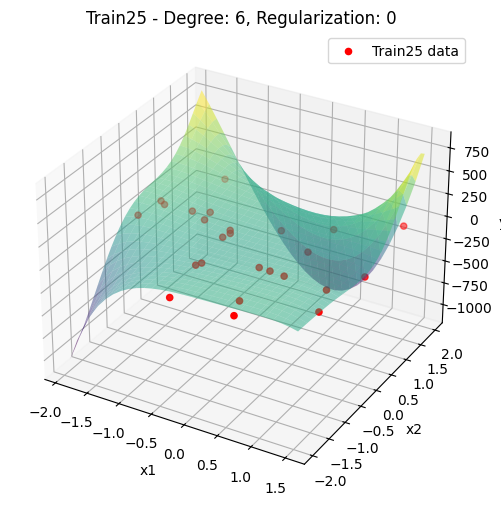

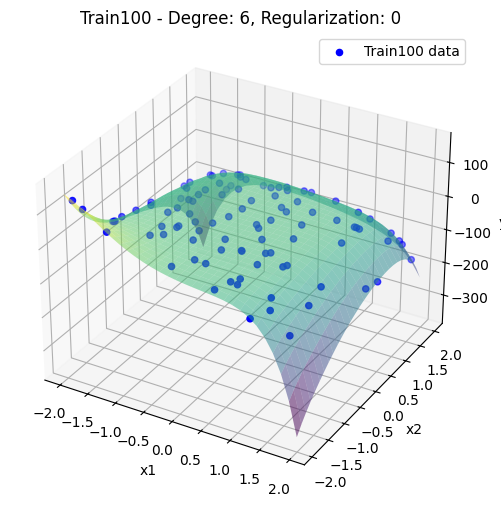

Degree: 6, Regularization: 0.001
	Train25_d2 Error: 0.02
	Test25_d2: 4.68
	Val25_d2: 4.95

	Train100: 0.08
	Test100_d2: 0.13
	Val100_d2: 0.14




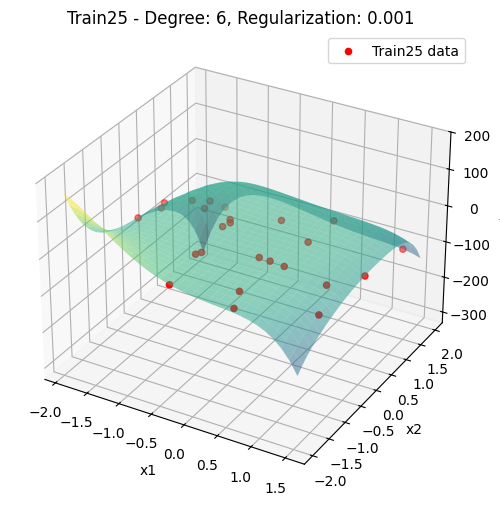

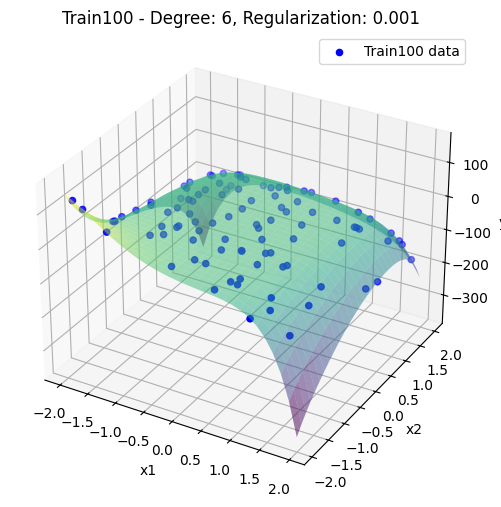

Degree: 6, Regularization: 0.1
	Train25_d2 Error: 0.08
	Test25_d2: 16.67
	Val25_d2: 9.34

	Train100: 0.09
	Test100_d2: 0.14
	Val100_d2: 0.13




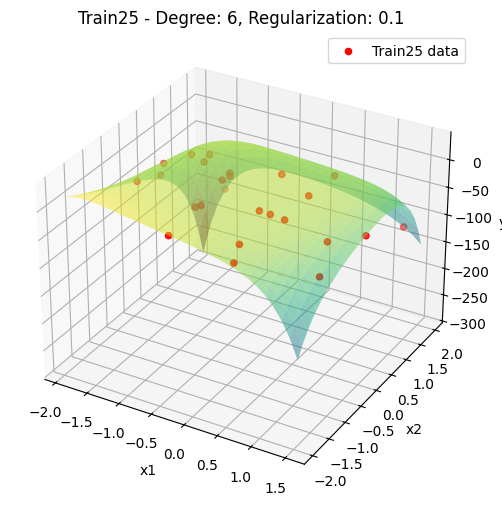

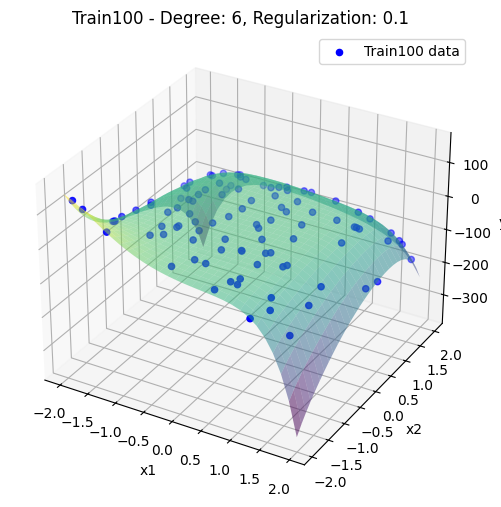

Degree: 6, Regularization: 1
	Train25_d2 Error: 0.26
	Test25_d2: 21.29
	Val25_d2: 11.84

	Train100: 0.19
	Test100_d2: 0.28
	Val100_d2: 0.33




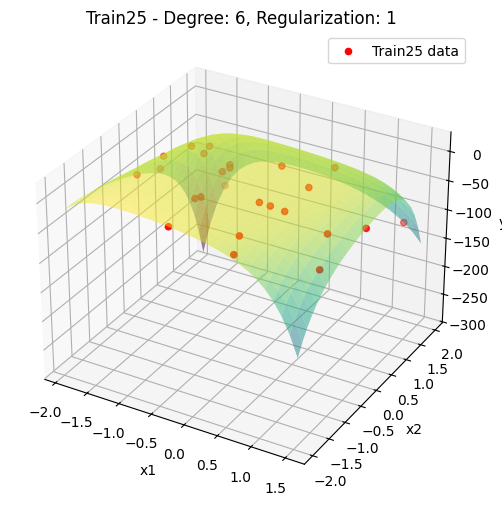

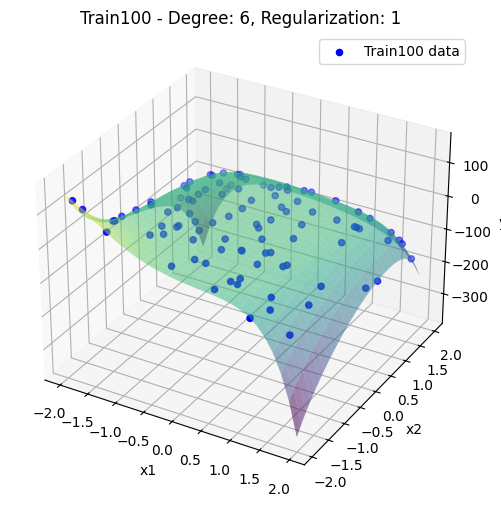

Degree: 8, Regularization: 0
	Train25_d2 Error: 281.63
	Test25_d2: 6935.00
	Val25_d2: 5835.30

	Train100: 0.07
	Test100_d2: 0.29
	Val100_d2: 0.37




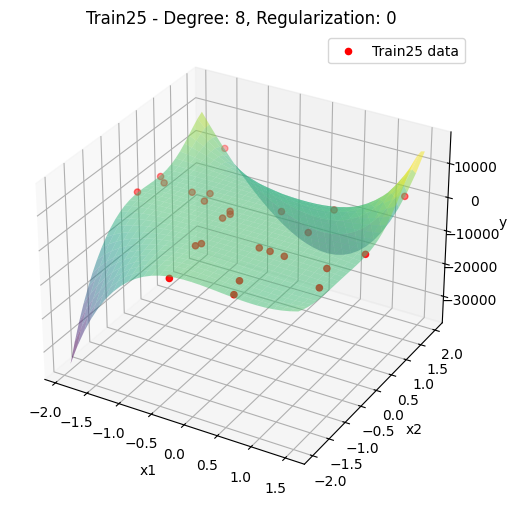

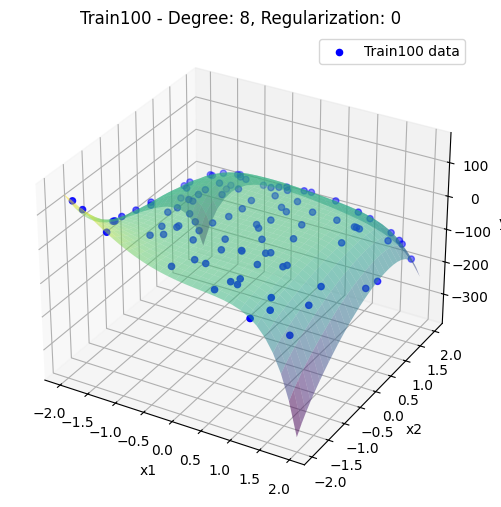

Degree: 8, Regularization: 0.001
	Train25_d2 Error: 0.01
	Test25_d2: 43.26
	Val25_d2: 21.04

	Train100: 0.07
	Test100_d2: 0.29
	Val100_d2: 0.37




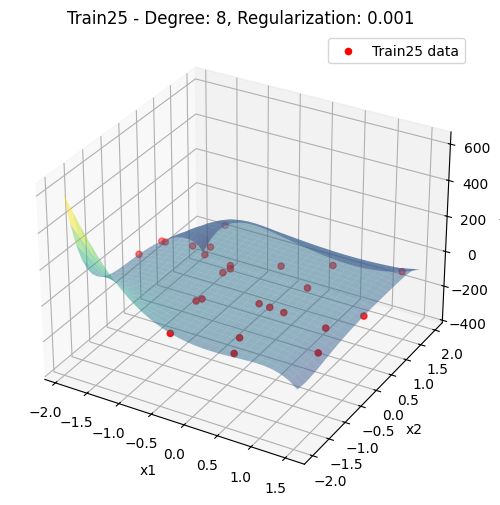

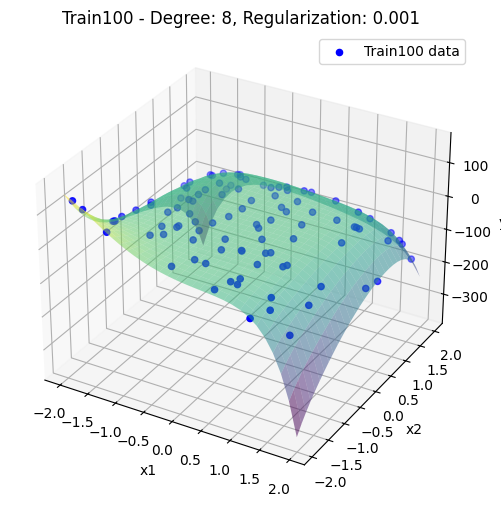

Degree: 8, Regularization: 0.1
	Train25_d2 Error: 0.11
	Test25_d2: 21.27
	Val25_d2: 18.66

	Train100: 0.09
	Test100_d2: 0.41
	Val100_d2: 0.69




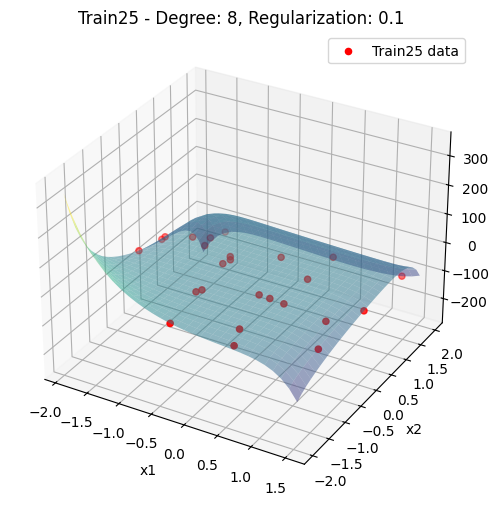

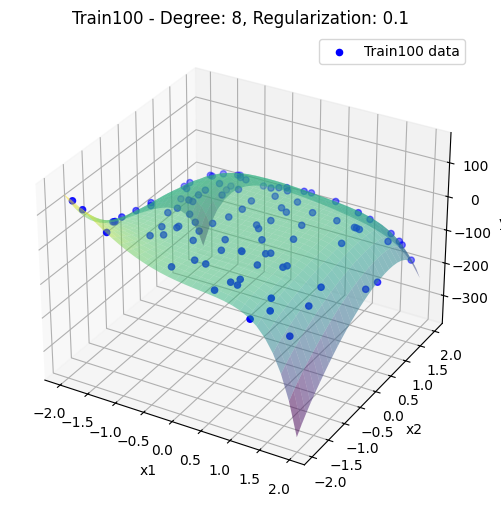

Degree: 8, Regularization: 1
	Train25_d2 Error: 0.31
	Test25_d2: 19.10
	Val25_d2: 22.50

	Train100: 0.20
	Test100_d2: 0.92
	Val100_d2: 1.65




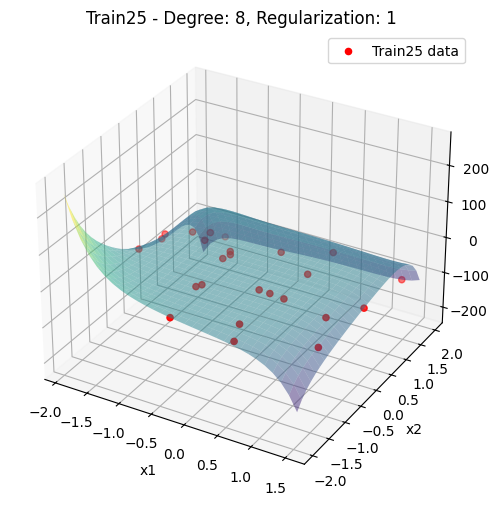

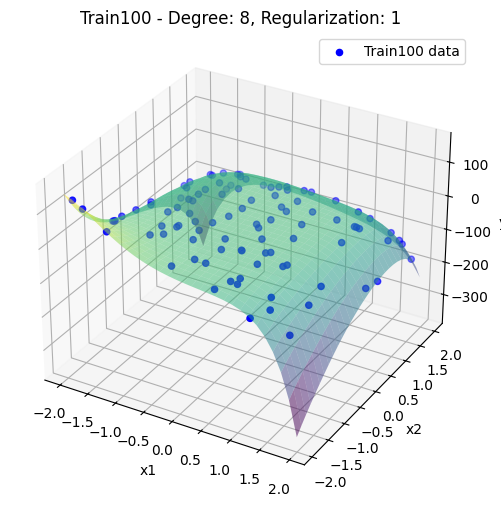

In [ ]:
# Dataset2
# Training loop
degrees = [6, 8]
results = {6: [], 8: []}
for degree in degrees:

    for l in [0, 0.001, 0.1, 1]:
      phi_train25_d2 = create_phi_d2(train25_d2, degree)
      phi_train100_d2 = create_phi_d2(train100_d2, degree)

      w_train25_d2 = get_weights_d2(train25_d2, phi_train25_d2, l)
      w_train100_d2 = get_weights_d2(train100_d2, phi_train100_d2, l)
      phi_test_d2 = create_phi_d2(test_d2, degree)
      phi_val_d2 = create_phi_d2(val_d2, degree)

      acc_train25_d2 = get_acc_d2(train25_d2, phi_train25_d2, w_train25_d2)
      acc_train100_d2 = get_acc_d2(train100_d2, phi_train100_d2, w_train100_d2)

      print(f'Degree: {degree}, Regularization: {l}')
      print(f'\tTrain25_d2 Error: {acc_train25_d2:.2f}')

      acc_test25_d2 = get_acc_d2(test_d2, phi_test_d2, w_train25_d2)
      acc_val25_d2 = get_acc_d2(val_d2, phi_val_d2, w_train25_d2)

      print(f'\tTest25_d2: {acc_test25_d2:.2f}')
      print(f'\tVal25_d2: {acc_val25_d2:.2f}')

      print(f'\n\tTrain100: {acc_train100_d2:.2f}')

      acc_test100_d2 = get_acc_d2(test_d2, phi_test_d2, w_train100_d2)
      acc_val100_d2 = get_acc_d2(val_d2, phi_val_d2, w_train100_d2)

      print(f'\tTest100_d2: {acc_test100_d2:.2f}')
      print(f'\tVal100_d2: {acc_val100_d2:.2f}')

      print('\n')

      # Plot for train25
      fig = plt.figure(figsize=(10,6))
      ax = fig.add_subplot(111, projection='3d')

      # scatter training data
      ax.scatter(train25_d2.x1, train25_d2.x2, train25_d2.y,
                color='red', label='Train25 data')

      # create meshgrid for surface
      x1_grid, x2_grid = np.meshgrid(
          np.linspace(train25_d2.x1.min(), train25_d2.x1.max(), 30),
          np.linspace(train25_d2.x2.min(), train25_d2.x2.max(), 30)
      )
      X_grid = np.column_stack([x1_grid.ravel(), x2_grid.ravel()])
      X_grid_df = pd.DataFrame(X_grid, columns=["x1", "x2"])   # ✅ convert for create_phi_d2

      phi_grid = create_phi_d2(X_grid_df, degree=degree)
      y_grid_pred = phi_grid @ w_train25_d2
      y_grid_pred = y_grid_pred.reshape(x1_grid.shape)

      # plot surface
      ax.plot_surface(x1_grid, x2_grid, y_grid_pred, alpha=0.5, cmap='viridis')

      ax.set_title(f"Train25 - Degree: {degree}, Regularization: {l}")
      ax.set_xlabel("x1")
      ax.set_ylabel("x2")
      ax.set_zlabel("y")
      ax.legend()
      plt.show()

      # Plot for train100
      fig = plt.figure(figsize=(10,6))
      ax = fig.add_subplot(111, projection='3d')

      # scatter training data
      ax.scatter(train100_d2.x1, train100_d2.x2, train100_d2.y,
                color='blue', label='Train100 data')

      # create meshgrid for surface
      x1_grid, x2_grid = np.meshgrid(
          np.linspace(train100_d2.x1.min(), train100_d2.x1.max(), 30),
          np.linspace(train100_d2.x2.min(), train100_d2.x2.max(), 30)
      )
      X_grid = np.column_stack([x1_grid.ravel(), x2_grid.ravel()])
      X_grid_df = pd.DataFrame(X_grid, columns=["x1", "x2"])   # ✅ convert for create_phi_d2

      phi_grid = create_phi_d2(X_grid_df, degree=degree)
      y_grid_pred = phi_grid @ w_train100_d2
      y_grid_pred = y_grid_pred.reshape(x1_grid.shape)

      # plot surface
      ax.plot_surface(x1_grid, x2_grid, y_grid_pred, alpha=0.5, cmap='viridis')

      ax.set_title(f"Train100 - Degree: {degree}, Regularization: {l}")
      ax.set_xlabel("x1")
      ax.set_ylabel("x2")
      ax.set_zlabel("y")
      ax.legend()
      plt.show()

      results[degree].append([[l, acc_train25_d2, acc_val25_d2, acc_test25_d2],
                              [l, acc_train100_d2, acc_val100_d2, acc_test100_d2]])

In [ ]:
print("Dataset 2-25-poly with reg degree=6")
for j in results[6]:
  i = j[0]
  print(f"{i[0]} & {i[1]:.2f} & {i[2]:.2f} & {i[3]:.2f} \\\\")

Dataset 2-25-poly with reg degree=6
0 & 153.91 & 257.12 & 314.37 \\
0.001 & 0.02 & 4.95 & 4.68 \\
0.1 & 0.08 & 9.34 & 16.67 \\
1 & 0.26 & 11.84 & 21.29 \\


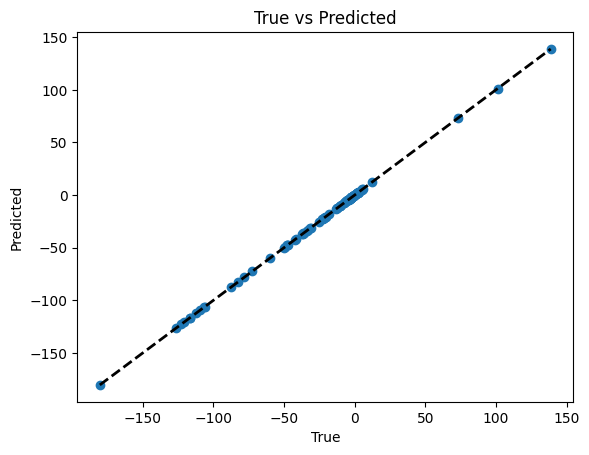

In [ ]:
degree = 6
l = 0.1

phi_train100_d2 = create_phi_d2(train100_d2, degree)
w_train100_d2 = get_weights_d2(train100_d2, phi_train100_d2, l)

y_pred = phi_train100_d2 @ w_train100_d2
plt.scatter(train100_d2.y, y_pred)
plt.plot([train100_d2.y.min(), train100_d2.y.max()], [train100_d2.y.min(), train100_d2.y.max()], 'k--', lw=2)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('True vs Predicted')
plt.show()

###Gaussian Basis Functions

In [ ]:
def get_centers_d2(data, num_funcs=1):
  x1_min, x1_max = data.x1.min(), data.x1.max()
  x2_min, x2_max = data.x2.min(), data.x2.max()

  # choose grid size close to sqrt(num_funcs)
  grid_size = int(np.ceil(np.sqrt(num_funcs)))

  # evenly spaced points along each axis
  x1_centers = np.linspace(x1_min, x1_max, grid_size)
  x2_centers = np.linspace(x2_min, x2_max, grid_size)

  # make meshgrid of centers
  xx1, xx2 = np.meshgrid(x1_centers, x2_centers)
  centers = np.column_stack([xx1.ravel(), xx2.ravel()])

  # pick only num_funcs centers (if grid produces more)
  return centers[:num_funcs]

In [ ]:
def create_phi_gaussian_d2(data, centers):
  sigma = 1/len(centers)*(centers.max()-centers.min())

  if hasattr(data, "x1"):   # DataFrame case
      X = data[["x1", "x2"]].values
  else:                     # Numpy array case
      X = np.asarray(data)

  N = X.shape[0]
  K = centers.shape[0]
  Phi = np.ones((N, K+1))   # bias + K Gaussians

  for j, mu in enumerate(centers):
      diff = X - mu   # shape (N,2)
      Phi[:, j+1] = np.exp(-np.sum(diff**2, axis=1) / (2 * sigma**2))

  return Phi

Num_Funcs: 2
	Train25_d2 Error: 31.28
	Test25_d2: 43.34
	Val25_d2: 51.86


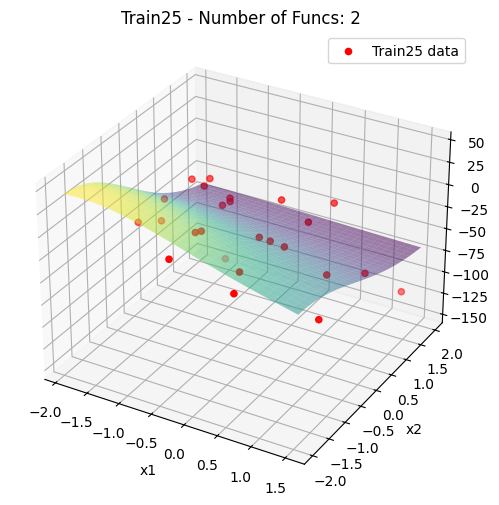



Num_Funcs: 3
	Train25_d2 Error: 30.77
	Test25_d2: 44.37
	Val25_d2: 51.78


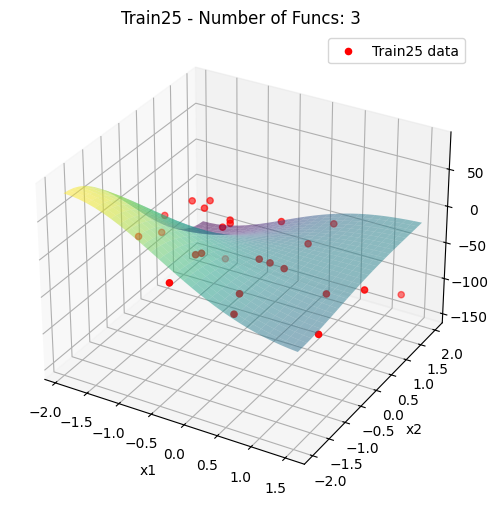

In [ ]:
# Training Loop
# Data25
results = []

num_funcs = [2, 3]
for num_func in num_funcs:
    centers = get_centers_d2(train25_d2, num_func)
    phi_train25_d2 = create_phi_gaussian_d2(train25_d2, centers)

    w_train25_d2 = get_weights_d2(train25_d2, phi_train25_d2)
    phi_test_d2 = create_phi_gaussian_d2(test_d2, centers)
    phi_val_d2 = create_phi_gaussian_d2(val_d2, centers)

    acc_train25_d2 = get_acc_d2(train25_d2, phi_train25_d2, w_train25_d2)

    print(f'Num_Funcs: {num_func}')
    print(f'\tTrain25_d2 Error: {acc_train25_d2:.2f}')
    acc_test25_d2 = get_acc_d2(test_d2, phi_test_d2, w_train25_d2)
    acc_val25_d2 = get_acc_d2(val_d2, phi_val_d2, w_train25_d2)
    print(f'\tTest25_d2: {acc_test25_d2:.2f}')
    print(f'\tVal25_d2: {acc_val25_d2:.2f}')

    #Plotting
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111, projection='3d')
    # scatter training data
    ax.scatter(train25_d2.x1, train25_d2.x2, train25_d2.y,
               color='red', label='Train25 data')

    # plot model
    x1_grid, x2_grid = np.meshgrid(
          np.linspace(train25_d2.x1.min(), train25_d2.x1.max(), 30),
          np.linspace(train25_d2.x2.min(), train25_d2.x2.max(), 30)
      )
    X_grid = np.column_stack([x1_grid.ravel(), x2_grid.ravel()])
    X_grid_df = pd.DataFrame(X_grid, columns=["x1", "x2"])   # ✅ convert for create_phi_d2

    phi_grid = create_phi_gaussian_d2(X_grid_df, centers)
    y_grid_pred = phi_grid @ w_train25_d2
    y_grid_pred = y_grid_pred.reshape(x1_grid.shape)

    # plot surface
    ax.plot_surface(x1_grid, x2_grid, y_grid_pred, alpha=0.5, cmap='viridis')

    ax.set_title(f"Train25 - Number of Funcs: {num_func}")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("y")
    ax.legend()
    plt.show()
    print('\n')

    results.append([[num_func, acc_train25_d2, acc_val25_d2, acc_test25_d2],
                    [num_func, acc_train100_d2, acc_val100_d2, acc_test100_d2]])


In [ ]:
print("Dataset 2-25-gaussian")
for j in results:
  i = j[0]
  print(f"{i[0]:.2f} & {i[1]:.2f} & {i[2]:.2f} & {i[3]:.2f} \\\\")

Dataset 2-25-gaussian
2.00 & 31.28 & 51.86 & 43.34 \\
3.00 & 30.77 & 51.78 & 44.37 \\


In [ ]:
results = []

Num_Funcs: 2
	Train100_d2 Error: 34.87
	Test100_d2: 38.33
	Val100_d2: 47.43


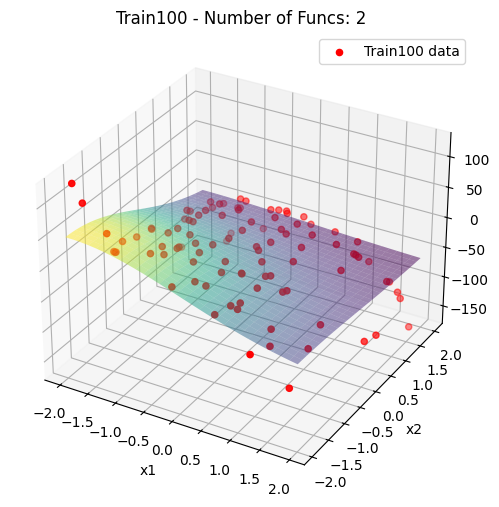



Num_Funcs: 5
	Train100_d2 Error: 27.80
	Test100_d2: 30.33
	Val100_d2: 38.50


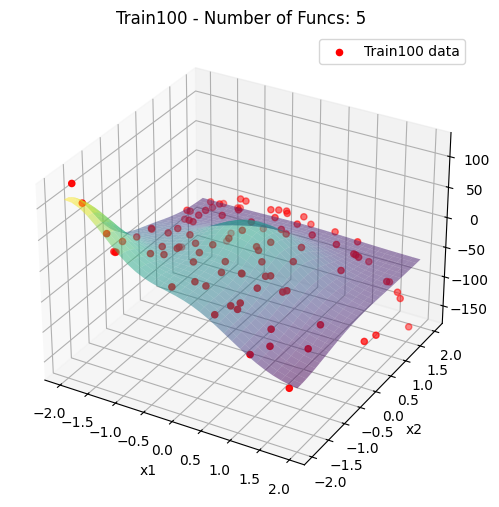



Num_Funcs: 8
	Train100_d2 Error: 29.48
	Test100_d2: 31.82
	Val100_d2: 39.52


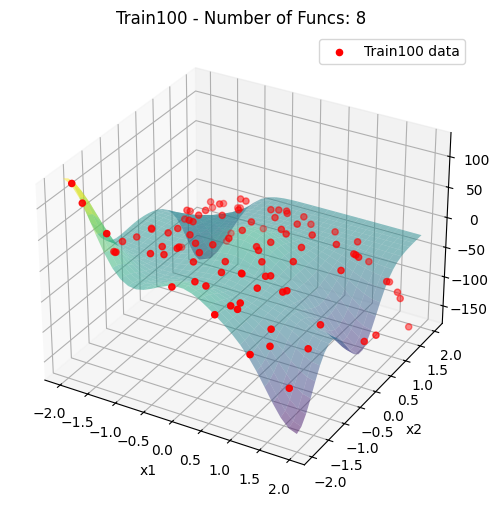



Num_Funcs: 10
	Train100_d2 Error: 30.88
	Test100_d2: 27.19
	Val100_d2: 36.64


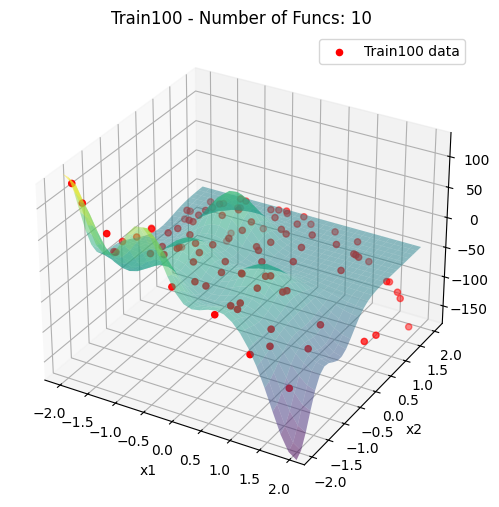

In [ ]:
# Training Loop
# Data100

num_funcs = [2, 5, 8, 10]
for num_func in num_funcs:
    centers = get_centers_d2(train100_d2, num_func)
    phi_train100_d2 = create_phi_gaussian_d2(train100_d2, centers)

    w_train100_d2 = get_weights_d2(train100_d2, phi_train100_d2)
    phi_test_d2 = create_phi_gaussian_d2(test_d2, centers)
    phi_val_d2 = create_phi_gaussian_d2(val_d2, centers)

    acc_train100_d2 = get_acc_d2(train100_d2, phi_train100_d2, w_train100_d2)

    print(f'Num_Funcs: {num_func}')
    print(f'\tTrain100_d2 Error: {acc_train100_d2:.2f}')
    acc_test100_d2 = get_acc_d2(test_d2, phi_test_d2, w_train100_d2)
    acc_val100_d2 = get_acc_d2(val_d2, phi_val_d2, w_train100_d2)
    print(f'\tTest100_d2: {acc_test100_d2:.2f}')
    print(f'\tVal100_d2: {acc_val100_d2:.2f}')

    #Plotting
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111, projection='3d')
    # scatter training data
    ax.scatter(train100_d2.x1, train100_d2.x2, train100_d2.y,
               color='red', label='Train100 data')

    # plot model
    x1_grid, x2_grid = np.meshgrid(
          np.linspace(train100_d2.x1.min(), train100_d2.x1.max(), 30),
          np.linspace(train100_d2.x2.min(), train100_d2.x2.max(), 30)
      )
    X_grid = np.column_stack([x1_grid.ravel(), x2_grid.ravel()])
    X_grid_df = pd.DataFrame(X_grid, columns=["x1", "x2"])   # ✅ convert for create_phi_d2

    phi_grid = create_phi_gaussian_d2(X_grid_df, centers)
    y_grid_pred = phi_grid @ w_train100_d2
    y_grid_pred = y_grid_pred.reshape(x1_grid.shape)

    # plot surface
    ax.plot_surface(x1_grid, x2_grid, y_grid_pred, alpha=0.5, cmap='viridis')

    ax.set_title(f"Train100 - Number of Funcs: {num_func}")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("y")
    ax.set_zlim(min(train100_d2.y), max(train100_d2.y))
    ax.legend()
    plt.show()
    print('\n')

    results.append([[num_func, acc_train25_d2, acc_val25_d2, acc_test25_d2],
                    [num_func, acc_train100_d2, acc_val100_d2, acc_test100_d2]])


In [ ]:
print("Dataset 2-100-gaussian")
for j in results:
  i = j[1]
  print(f"{i[0]} & {i[1]:.2f} & {i[2]:.2f} & {i[3]:.2f} \\\\")

Dataset 2-100-gaussian
2 & 34.87 & 47.43 & 38.33 \\
5 & 27.80 & 38.50 & 30.33 \\
8 & 29.48 & 39.52 & 31.82 \\
10 & 30.88 & 36.64 & 27.19 \\


In [ ]:
max(train100_d2.x1), max(train100_d2.x2), min(train100_d2.x1), min(train100_d2.x2)

(1.9617267931358304,
 1.9884618868484063,
 -1.9917719170857509,
 -1.9420452553628451)

In [ ]:
max(train100_d2.y), min(train100_d2.y)

(138.76729968189207, -180.3365851344968)

##Dataset 3

In [ ]:
train_d3 = pd.read_csv('/content/drive/MyDrive/PRML/Assignment-1/Dataset3/dataset3_train.csv')
test_d3 = pd.read_csv('/content/drive/MyDrive/PRML/Assignment-1/Dataset3/dataset3_test.csv')
val_d3 = pd.read_csv('/content/drive/MyDrive/PRML/Assignment-1/Dataset3/dataset3_val.csv')

In [ ]:
print("train_d3.shape:", train_d3.shape)
print("test_d3.shape:", test_d3.shape)
print("val_d3.shape:", val_d3.shape)

train_d3.shape: (350, 6)
test_d3.shape: (50, 6)
val_d3.shape: (100, 6)


###Polynomial Basis Functions

In [ ]:
import itertools

def _generate_exponent_tuples(n_vars, degree):

    exponents = [(0,)*n_vars]  #bias term degree 0
    for total_deg in range(1, degree+1):
        for comb in itertools.combinations_with_replacement(range(n_vars), total_deg):
            count = [0]*n_vars
            for idx in comb:
                count[idx] += 1
            exponents.append(tuple(count))
    return exponents

In [ ]:
def create_phi_d3(data, degree):

    exponents = _generate_exponent_tuples(3,degree)
    temp = ([1]*data.shape[0],)

    for exp in exponents[1:]:
        temp += ( (data.x1**exp[0]) * (data.x2**exp[1]) * (data.x3**exp[2]), )



    phi = np.array(temp).T
    return phi

In [ ]:
def get_weights_d3(data, phi, lamda=0):
    n = phi.shape[1]

    y = ( train_d3.y1, train_d3.y2, train_d3.y3 )
    y = np.asarray(y)

    w = np.linalg.inv(phi.T @ phi + lamda * np.identity(n)) @ phi.T @ y.T
    return w

In [ ]:
def get_acc_d3(phi, w, y):
    return np.sqrt(((phi @ w - y)**2).mean(axis=0)).mean()

In [ ]:
# Dataset3
# Training loop

y_train_d3 = train_d3[["y1","y2","y3"]].values
y_test_d3  = test_d3[["y1","y2","y3"]].values
y_val_d3   = val_d3[["y1","y2","y3"]].values

degrees = [2, 3, 4]
for degree in degrees:
    phi_train_d3 = create_phi_d3(train_d3, degree)

    w_train_d3 = get_weights_d3(train_d3, phi_train_d3)
    phi_test_d3 = create_phi_d3(test_d3, degree)
    phi_val_d3 = create_phi_d3(val_d3, degree)

    acc_train_d3 = get_acc_d3(phi_train_d3, w_train_d3, y_train_d3)

    # print(f'Degree: {degree}')
    # print(f'\tTrain_d3 Error: {acc_train_d3}')

    acc_test_d3 = get_acc_d3(phi_test_d3, w_train_d3, y_test_d3)
    acc_val_d3 = get_acc_d3(phi_val_d3, w_train_d3, y_val_d3)

    # print(f'\tTest_d3: {acc_test_d3}')
    # print(f'\tVal_d3: {acc_val_d3}')

    # print('\n')

    (print(f"{degree} & {acc_train_d3:.4f} & {acc_test_d3:.4f} & {acc_val_d3:.4f} \\\\"))

2 & 0.3805 & 0.3687 & 0.4087 \\
3 & 0.3729 & 0.3700 & 0.4121 \\
4 & 0.3662 & 0.3807 & 0.4125 \\


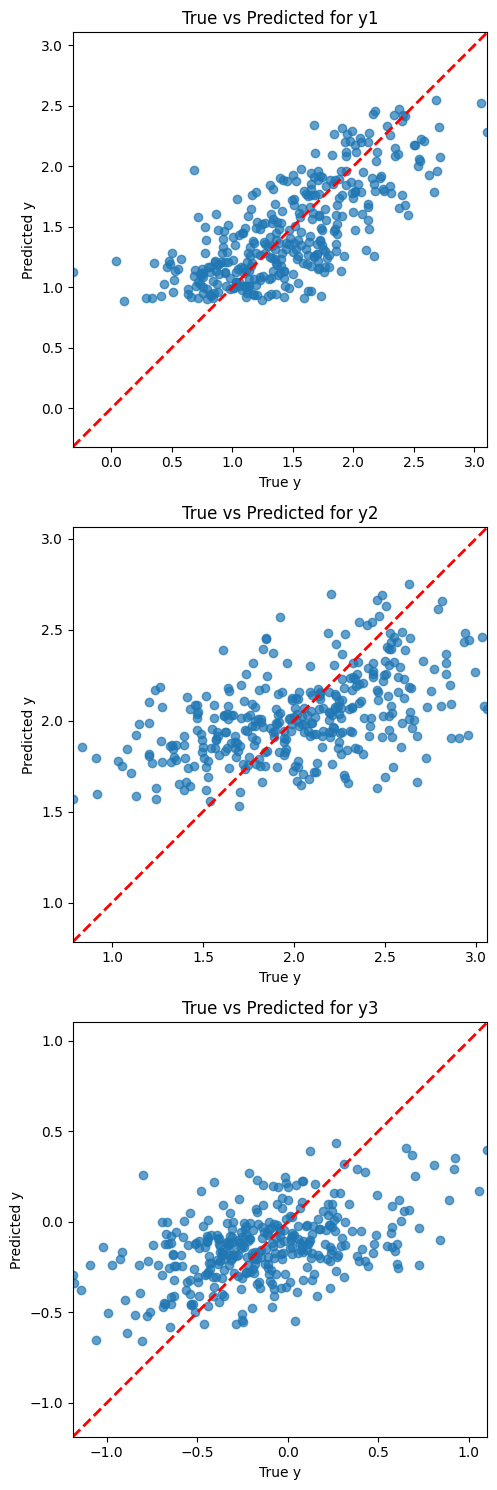

In [ ]:
# Plotting tn vs yn for degree=2
degree = 2
phi_train_d3 = create_phi_d3(train_d3, degree)
w_train_d3 = get_weights_d3(train_d3, phi_train_d3)

y_pred = phi_train_d3 @ w_train_d3
y = train_d3[["y1","y2","y3"]].values

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

for i in range(3):
    axs[i].scatter(y[:, i], y_pred[:, i], alpha=0.7)

    # x=y line
    min_val = min(y[:, i].min(), y_pred[:, i].min())
    max_val = max(y[:, i].max(), y_pred[:, i].max())
    axs[i].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)

    # labels and limits
    axs[i].set_xlabel('True y')
    axs[i].set_ylabel('Predicted y')
    axs[i].set_title(f'True vs Predicted for y{i+1}')
    axs[i].set_xlim(min_val, max_val)
    axs[i].set_ylim(min_val, max_val)
    axs[i].set_aspect('equal', 'box')

plt.tight_layout()
plt.show()


### Gaussian Basis Function

In [ ]:
def get_centers_d3(data, num_funcs):
    X = data[["x1","x2","x3"]].values
    idx = np.linspace(0, len(X)-1, num_funcs, dtype=int)
    return X[idx]

In [ ]:
def create_phi_gaussian_d3(data, centers):
    sigma = 1/len(centers)*(centers.max()-centers.min())
    X = data[["x1","x2","x3"]].values
    N = X.shape[0]
    K = centers.shape[0]
    Phi = np.ones((N, K+1))   # bias + Gaussians

    for j, mu in enumerate(centers):
        diff = X - mu
        Phi[:, j+1] = np.exp(-np.sum(diff**2, axis=1) / (2*sigma**2))
    return Phi

In [ ]:
350*0.05, 35

(17.5, 35)

In [ ]:
for num_func in [20, 25, 30, 35]:
  centers = get_centers_d3(train_d3, num_func)

  phi_train_d3 = create_phi_gaussian_d3(train_d3, centers)
  phi_val_d3   = create_phi_gaussian_d3(val_d3, centers)
  phi_test_d3  = create_phi_gaussian_d3(test_d3, centers)

  # weights (multi-output, same as polynomial case)
  w_gauss_d3 = np.linalg.inv(phi_train_d3.T @ phi_train_d3) @ phi_train_d3.T @ y_train_d3

  # errors
  train_err = get_acc_d3(phi_train_d3, w_gauss_d3, y_train_d3)
  val_err   = get_acc_d3(phi_val_d3, w_gauss_d3, y_val_d3)
  test_err  = get_acc_d3(phi_test_d3, w_gauss_d3, y_test_d3)

  # print(f"Gaussian basis (num_funcs={num_func}):")
  # print(f"\tTrain Error: {train_err}")
  # print(f"\tVal Error:   {val_err}")
  # print(f"\tTest Error:  {test_err}")

  (print(f"{num_func} & {train_err} & {val_err} & {test_err} \\\\"))

20 & 0.4607566713196172 & 0.4831303518950694 & 0.4268091955421243 \\
25 & 0.4619513229151502 & 0.48625937148620185 & 0.42821495277091987 \\
30 & 0.4602005090366364 & 0.48681055657858313 & 0.42898112662116894 \\
35 & 0.45047487757582444 & 0.4862643569160438 & 0.42904394019792563 \\


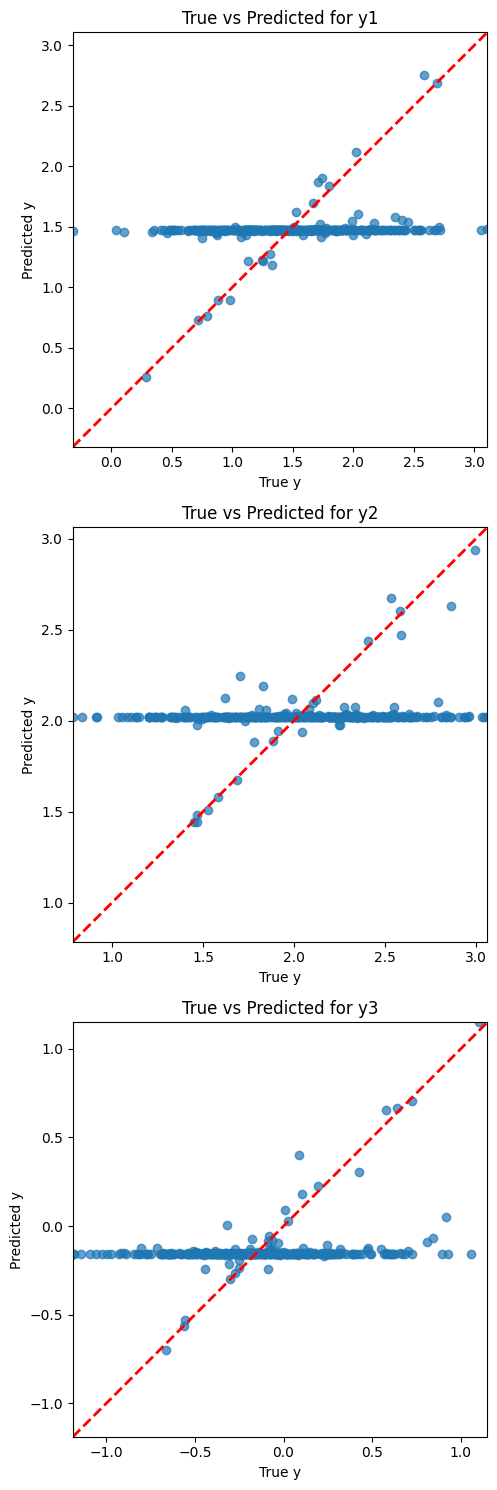

In [ ]:
# Plotting tn vs yn for num_func=20
num_func = 20
centers = get_centers_d3(train_d3, num_func)
phi_train_d3 = create_phi_gaussian_d3(train_d3, centers)
w_gauss_d3 = np.linalg.inv(phi_train_d3.T @ phi_train_d3) @ phi_train_d3.T @ y_train_d3

y_pred = phi_train_d3 @ w_gauss_d3
y = train_d3[["y1","y2","y3"]].values

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

for i in range(3):
    axs[i].scatter(y[:, i], y_pred[:, i], alpha=0.7)

    # x=y line
    min_val = min(y[:, i].min(), y_pred[:, i].min())
    max_val = max(y[:, i].max(), y_pred[:, i].max())
    axs[i].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)

    # labels and limits
    axs[i].set_xlabel('True y')
    axs[i].set_ylabel('Predicted y')
    axs[i].set_title(f'True vs Predicted for y{i+1}')
    axs[i].set_xlim(min_val, max_val)
    axs[i].set_ylim(min_val, max_val)
    axs[i].set_aspect('equal', 'box')

plt.tight_layout()
plt.show()